In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

데이터 로드 및 탐색

In [2]:
# 데이터 로딩
df = pd.read_csv('wine.csv')

# 데이터 확인
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


결측치 확인

In [3]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

목표 변수 생성

In [14]:
# 목표 변수 생성 (예: 'Alcohol' 값으로 와인을 분류)
df['quality'] = df['Alcohol'].apply(lambda x: 1 if x >= 12 else 0)

특성과 레이블 나누기

In [ ]:
X = df.drop('quality', axis=1)  # 특성 데이터 (와인 속성들)
y = df['quality']  # 레이블 데이터 (와인 품질)

학습용 데이터와 테스트용 데이터 분리

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

표준화

In [16]:
# 데이터를 표준화 (Standardize)
scaler = StandardScaler()  # StandardScaler 객체를 생성
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터만 사용해 표준화
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터는 훈련 데이터의 스케일러를 사용해 변환

신경망 모델 정의 (Keras)

c:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6005 - loss: 0.7340 - val_accuracy: 0.8333 - val_loss: 0.5842
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7286 - loss: 0.5847 - val_accuracy: 0.8889 - val_loss: 0.4768
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8460 - loss: 0.4791 - val_accuracy: 0.9444 - val_loss: 0.4020
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8755 - loss: 0.4008 - val_accuracy: 0.9444 - val_loss: 0.3493
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8898 - loss: 0.3277 - val_accuracy: 0.9444 - val_loss: 0.3152
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8993 - loss: 0.2889 - val_accuracy: 0.9444 - val_loss: 0.2932
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8893 - loss: 0.2747 - val_accuracy: 0.9444 - val_loss: 0.2806
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8650 - loss: 0.2952 - val_accuracy: 0.9444 - val_loss: 0.2714


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


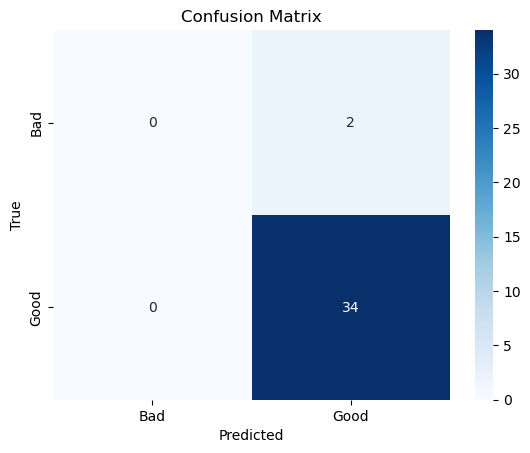

In [17]:
# 모델 구축
model = Sequential()

# 입력층과 첫 번째 은닉층 (Fully Connected Layer)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (이진 분류)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# 모델 평가
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # 예측값을 0과 1로 변환

# 모델 평가 - 정확도, 분류 리포트, 혼동 행렬
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 리포트
print('Classification Report:')
print(classification_report(y_test, y_pred))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
